# TESLA

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("TSLA.csv") 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [105]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [106]:

data = data[["Date","Close"]] 

data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [107]:
data['ds'] = pd.to_datetime(data['ds'])
data.set_index('ds', inplace=True)

In [108]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [109]:
adf_test(data['y'])

1. ADF :  1.4000685020861596
2. P-Value :  0.9971144530803391
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2397
5. Critical Values :
	 1% :  -3.4330810457844425
	 5% :  -2.862746538733181
	 10% :  -2.567412291147901


In [110]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [111]:
stepwise_fit = auto_arima(data['y'],trace=True, suppress_warnings=True)     

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16299.661, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16298.813, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16299.182, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16302.401, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16289.466, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16291.420, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16291.416, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16275.419, Time=1.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16291.515, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16289.519, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16274.459, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16301.680, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16301.266, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]  

In [112]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2416
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -8134.230
Date:                Fri, 25 Oct 2024   AIC                          16274.459
Time:                        23:44:47   BIC                          16291.828
Sample:                             0   HQIC                         16280.776
                               - 2416                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.008    128.710      0.000       0.982       1.013
ma.L1         -0.9717      0.012    -82.049      0.000      -0.995      -0.949
sigma2        49.3047      0.495     99.594      0.000      48.334      50.275
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            226632.07
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              27.66   Skew:                             2.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
from statsmodels.tsa.arima.model import ARIMA


In [114]:
train = data[:'2019-12-31']
test = data['2020-01-01':]

In [126]:
model = ARIMA(data['y'], order=(1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2416
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8134.230
Date:                Fri, 25 Oct 2024   AIC                          16274.459
Time:                        23:55:45   BIC                          16291.828
Sample:                             0   HQIC                         16280.776
                               - 2416                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.008    128.710      0.000       0.982       1.013
ma.L1         -0.9717      0.012    -82.049      0.000      -0.995      -0.949
sigma2        49.3047      0.495     99.594      0.000      48.334      50.275
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            226632.07
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              27.66   Skew:                             2.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
start = len(train)
end = len(train) + len(test) - 1  
#predictions = model.predict(start=start, end=end)
predictions = model.forecast(steps=10)
#predictions.index = test.index
print(predictions)

2416    789.084130
2417    798.144177
2418    807.180204
2419    816.192274
2420    825.180451
2421    834.144799
2422    843.085381
2423    852.002259
2424    860.895497
2425    869.765158
Name: predicted_mean, dtype: float64


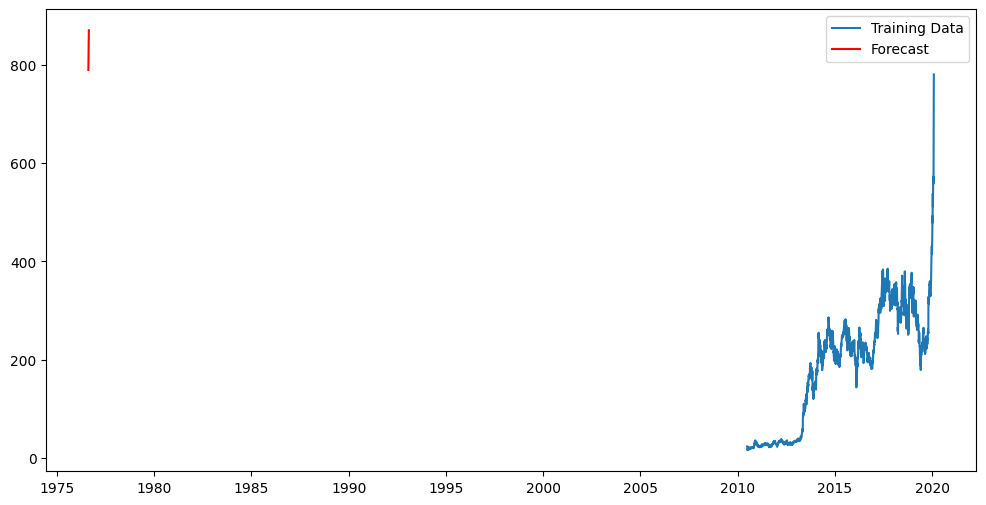

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Training Data')
plt.plot(predictions, label='Forecast', color='red')
plt.legend()
plt.show()

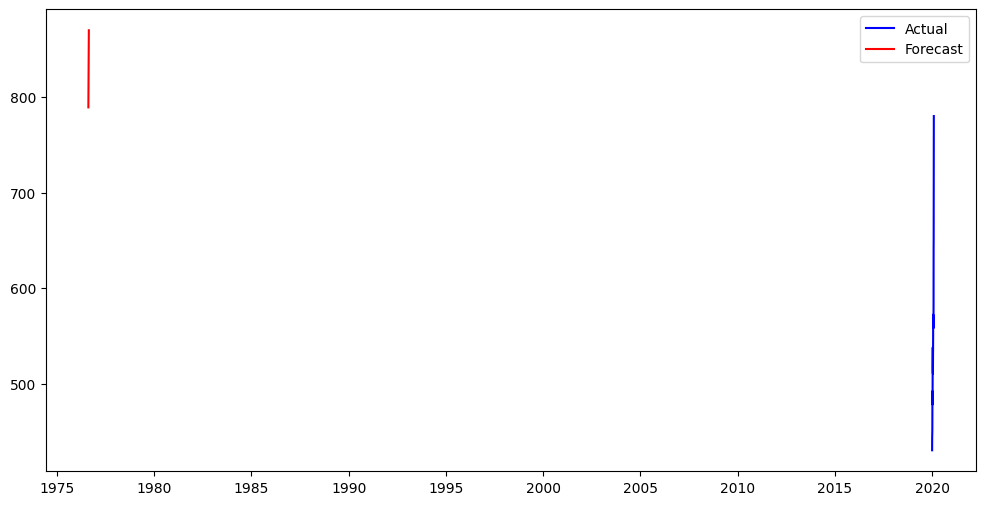

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual',color = 'blue')
plt.plot(predictions, label='Forecast', color='red')
plt.legend()
plt.show()